# Face and Mask

In [1]:
import cv2
import matplotlib.pyplot as plt
import helpers
import numpy as np
import tensorflow as tf
import glob
import random
from retinaface import RetinaFace
from PIL import Image

## Facial Recognition
We use retinaface to detect facial features

In [2]:
# Initialize facial detection
detector = RetinaFace(quality = "normal")

model[normal quality] init ..
model success !


In [3]:
# The actual detection of faces
img = detector.read("test.jpg")
faces = detector.predict(img)

In [4]:
# Crop images
img = Image.open("test.jpg")
cropImages = []
for face in faces:
    cropImages.append(img.crop((face['x1'], face['y1'], face['x2'], face['y2'
    ])))

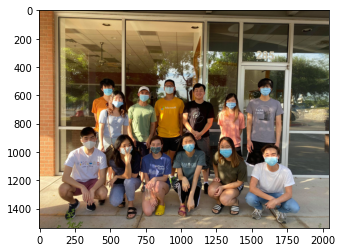

<Figure size 432x288 with 0 Axes>

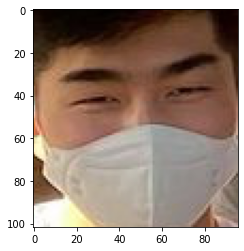

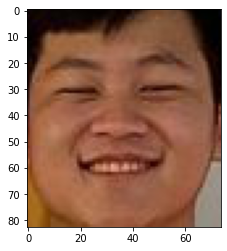

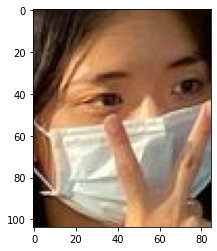

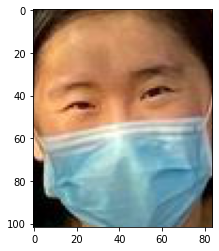

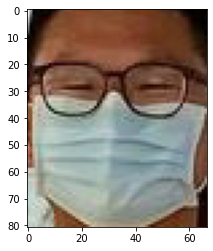

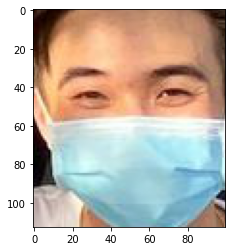

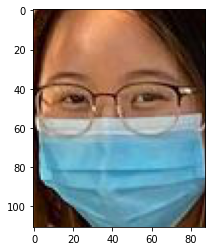

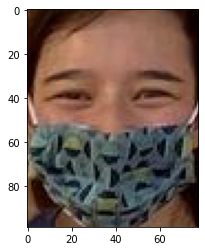

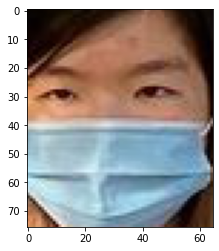

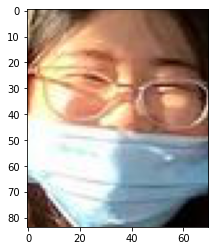

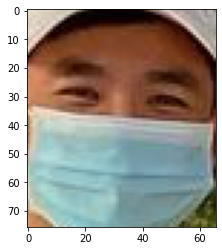

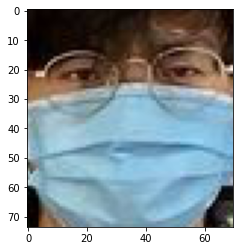

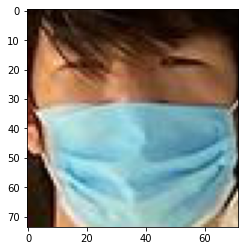

In [5]:
# Display the faces and original image
%matplotlib inline
plt.imshow(np.asarray(img))
plt.figure()
for i in cropImages:
    plt.figure()
    plt.imshow(i)

## Mask Detection
we will now pass cropImages through the mask classifier

In [6]:
dim = 64

# I am passing in PIL images, this converts it to PIL
def resize_img(pic):
    image_array = tf.keras.preprocessing.image.img_to_array(pic)
    img = tf.convert_to_tensor(image_array, dtype = 'uint8')
    img = tf.image.resize(img, [dim, dim])
    img = img/127.5-1
    return img

In [7]:
# The neural network

def conv_model(num_blocks, rate, dim):
    
    input = tf.keras.layers.Input(shape=(dim,dim,3))
    
    x = tf.keras.layers.Conv2D(16, (16,16), strides=1)(input)
    x = tf.keras.layers.Dropout(rate)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
        
    for i in range(num_blocks-1):
        x = tf.keras.layers.Conv2D(8, (8,8), strides=1)(x)
        x = tf.keras.layers.Dropout(rate)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
        
    x = tf.keras.layers.Conv2D(filters=2, kernel_size=1, strides=1)(x)
    x = tf.keras.layers.Dropout(rate)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GlobalMaxPooling2D()(x)
    predictions = tf.keras.layers.Activation('softmax')(x)
    
    model = tf.keras.Model(inputs=input, outputs=predictions)
    print(model.summary())
    
    return model

In [8]:
num_blocks = 3
dropout = .1
model = conv_model(num_blocks,.1, dim)
model.load_weights('mask_classification_model_3_50.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 49, 49, 16)        12304     
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49, 49, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 8)         8200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 42, 42, 8)         0     

In [9]:
# Prediction function, passes in PIL image
def pred(pic):
    im = resize_img(pic) # Convert and resize PIL image to 64x64 tensor
    vals = model.predict(np.expand_dims(im,axis=0))
    print(f"Mask Val: {vals[0][0]}, Non-mask Val: {vals[0][1]}")
    prediction = np.argmax(vals,axis=1)
    print(f"Image predicted as {prediction}")
    return prediction

In [10]:
maskResults = []
for face in cropImages:
    result = pred(face)

Mask Val: 0.9910832643508911, Non-mask Val: 0.008916682563722134
Image predicted as [0]
Mask Val: 0.02029706910252571, Non-mask Val: 0.979702889919281
Image predicted as [1]
Mask Val: 0.9475284814834595, Non-mask Val: 0.05247148498892784
Image predicted as [0]
Mask Val: 0.9781445860862732, Non-mask Val: 0.021855473518371582
Image predicted as [0]
Mask Val: 0.9916129112243652, Non-mask Val: 0.00838708970695734
Image predicted as [0]
Mask Val: 0.9508954882621765, Non-mask Val: 0.04910454526543617
Image predicted as [0]
Mask Val: 0.9912887811660767, Non-mask Val: 0.008711186237633228
Image predicted as [0]
Mask Val: 0.9964062571525574, Non-mask Val: 0.0035937544889748096
Image predicted as [0]
Mask Val: 0.9973682761192322, Non-mask Val: 0.002631762996315956
Image predicted as [0]
Mask Val: 0.9831631779670715, Non-mask Val: 0.016836853697896004
Image predicted as [0]
Mask Val: 0.9968957901000977, Non-mask Val: 0.003104238538071513
Image predicted as [0]
Mask Val: 0.9966210126876831, Non-ma